# <font color='red'>  Total Execution time needed :3.5 Hours  </font>  </h1>

# <h1 align="center"> <font color='blue'>  HaikuJAM  </font>  </h1>

# Planned Models Based On Dataset:  </h1>
   ## 1. Building basic model with Skewed Dataset-------------->Result: <font color='red'>  Failed!!!! </font>  </h1> 
   ## 2. AutoEncoder based model------------------------------->Result:<font color='red'>  Failed!!!  </font>  </h1>
   ## 3. Neural Network based model---------------------------->Result:<font color='red'>  Failed!!!  </font>  </h1>
   ## 4. Down sampling model----------------------------------->Result:<font color='red'>  Failed!!!  </font>  </h1>
   
# Best Models Based On Dataset:  
   ## 1. Technique used---------------------------------------->Result: <font color='Green'>  Sucess!!!! </font>  </h1> 
              a. Upsampling using Smote 
              b. Sacling a feature
              c. Removing irrelevant Feature
              d. Fitting Model
   ## 2. Random Forest Classifier(accuracy:80%)---------------->Result:<font color='green'>  Sucess!!!  </font>  </h1>
   ## 3. ExtraTree Classifier(Accuracy:82.3%)------------------>Result:<font color='green'>  Sucess!!!  </font>  </h1>
   ## 4. Cat_Boost_Classifier(Accuracy:92%)-------------------->Result:<font color='green'>  Sucess!!!  </font>  </h1>
   ## 5. LGBMClassifie(Accuracy:86%)-------------------->Result:<font color='green'>  Sucess!!!  </font>  </h1>

In [1]:
## Loading libraries
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification

##Up sampling package
from imblearn.over_sampling import SMOTE

##Pre processing
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold


import eli5
from eli5.sklearn import PermutationImportance
#warnings
import warnings
warnings.filterwarnings("ignore")



C:\Users\Administrator\.conda\envs\tf3.7\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Administrator\.conda\envs\tf3.7\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
C:\Users\Administrator\.conda\envs\tf3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:516

In [2]:
## Loading traing anf test data sets
df1= pd.read_csv('BuyAffinity_Train.txt',sep='\t',index_col=[0],parse_dates=['F15', 'F16'])


In [3]:
test = pd.read_csv('BuyAffinity_Test.txt',sep='\t',index_col=[0],parse_dates=['F15', 'F16'])

In [4]:
print('Shape of our Training data',df1.shape)
print('Shape of our Testing data',df1.shape)

Shape of our Training data (101180, 23)
Shape of our Testing data (101180, 23)


# The classes are heavily skewed we need to solve this issue later

In [5]:
print('Not Buying', round(df1['C'].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Buying', round(df1['C'].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

Not Buying 75.46 % of the dataset
Buying 24.54 % of the dataset


## Plot shows Skewed Distribution of datasets

Text(0.5, 1.0, 'Class Distributions \n (0: Not Buying || 1: Buying)')

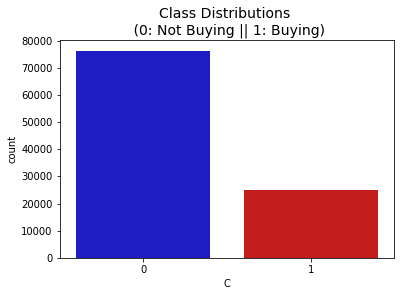

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('C', data=df1, palette=colors)
plt.title('Class Distributions \n (0: Not Buying || 1: Buying)', fontsize=14)

## Features follows uniform distribution

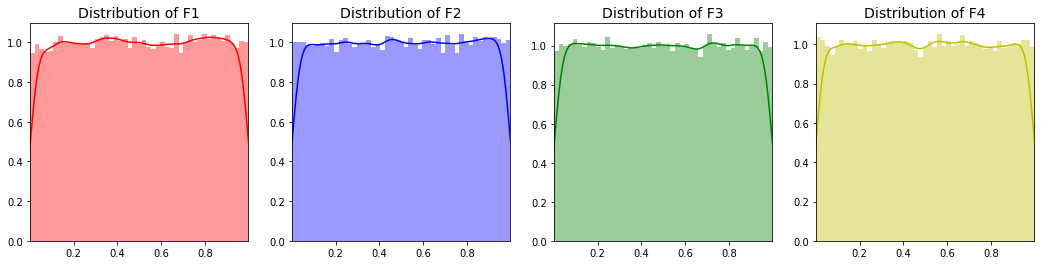

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

F1 = df1['F1'].values
F2 = df1['F2'].values
F3 = df1['F3'].values
F4 = df1['F4'].values

sns.distplot(F1, ax=ax[0], color='r')
ax[0].set_title('Distribution of F1', fontsize=14)
ax[0].set_xlim([min(F1), max(F1)])

sns.distplot(F2, ax=ax[1], color='b')
ax[1].set_title('Distribution of F2', fontsize=14)
ax[1].set_xlim([min(F2), max(F2)])

sns.distplot(F3, ax=ax[2], color='g')
ax[2].set_title('Distribution of F3', fontsize=14)
ax[2].set_xlim([min(F3), max(F3)])

sns.distplot(F4, ax=ax[3], color='y')
ax[3].set_title('Distribution of F4', fontsize=14)
ax[3].set_xlim([min(F4), max(F4)])

plt.show()

## Due to uniform distribution There is no outliers

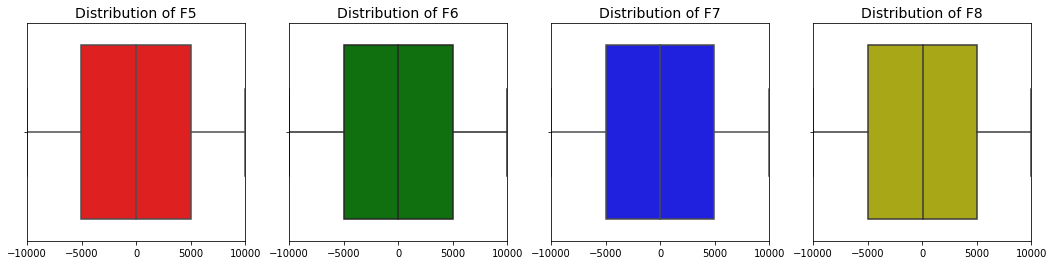

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

F5 = df1['F5'].values
F6 = df1['F6'].values
F7 = df1['F7'].values
F8 = df1['F8'].values

sns.boxplot(F5, ax=ax[0], color='r')
ax[0].set_title('Distribution of F5', fontsize=14)
ax[0].set_xlim([min(F5), max(F5)])

sns.boxplot(F6, ax=ax[1], color='g')
ax[1].set_title('Distribution of F6', fontsize=14)
ax[1].set_xlim([min(F6), max(F6)])

sns.boxplot(F7, ax=ax[2], color='b')
ax[2].set_title('Distribution of F7', fontsize=14)
ax[2].set_xlim([min(F7), max(F7)])

sns.boxplot(F8, ax=ax[3], color='y')
ax[3].set_title('Distribution of F8', fontsize=14)
ax[3].set_xlim([min(F8), max(F8)])

plt.show()

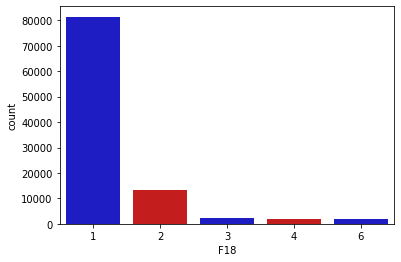

In [10]:
sns.countplot('F18', data=df1, palette=colors)

### Box plot shows that Majority data belongs to one class

(-10000, 10000)

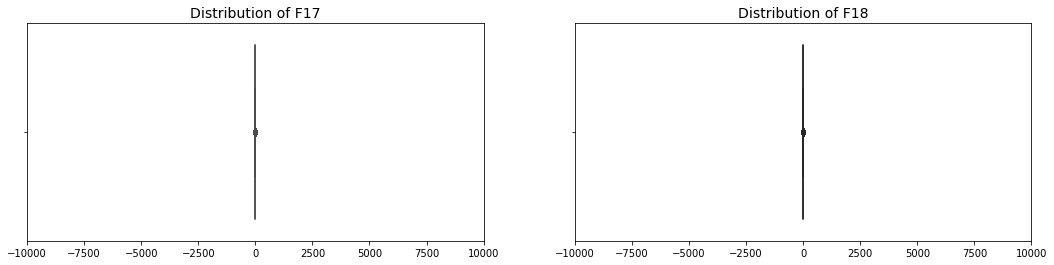

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

F17 = df1['F17'].values
F18 = df1['F18'].values


sns.boxplot(F17, ax=ax[0], color='r')
ax[0].set_title('Distribution of F17', fontsize=14)
ax[0].set_xlim([min(F5), max(F5)])

sns.boxplot(F18, ax=ax[1], color='g')
ax[1].set_title('Distribution of F18', fontsize=14)
ax[1].set_xlim([min(F6), max(F6)])


## plot shows that there is only little to zero correlation

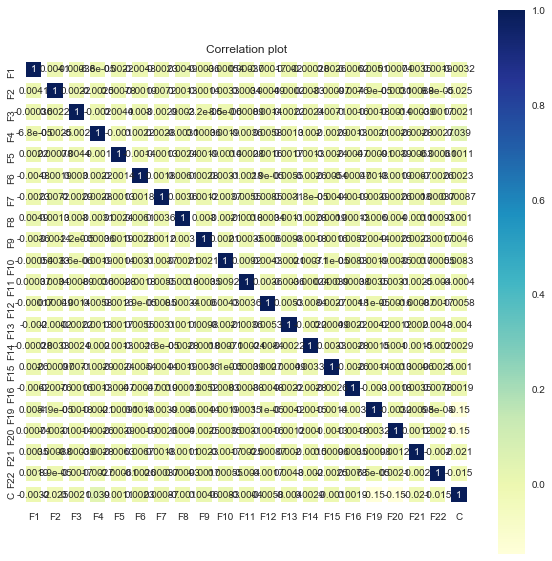

In [72]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(df1.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

## Identifying best Numerical Feature Based on T-test

In [67]:
numerical = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14',
             'F15','F16','F19','F20']

## some feature are less significant but still we consider for our analysis

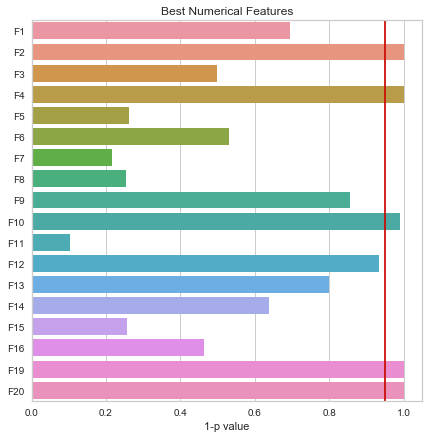

In [68]:
#T Test for numerical columns
p=[]
from scipy.stats import ttest_ind

for i in numerical:
    df_1=df1.groupby('C').get_group(0)
    df_2=df1.groupby('C').get_group(1)
    t,pvalue=ttest_ind(df_1[i],df_2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Best Numerical Features')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

## converting a date to Ordindal Formate

In [12]:
## Setting display options
pd.set_option('display.max_columns',None)


##Date Conversion
df1['F15']=df1['F15'].map(dt.datetime.toordinal)
df1['F16']=df1['F16'].map(dt.datetime.toordinal)


In [13]:
##Date Conversion
test['F15']=test['F15'].map(dt.datetime.toordinal)
test['F16']=test['F16'].map(dt.datetime.toordinal)

In [14]:

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df1['F5'] = rob_scaler.fit_transform(df1['F5'].values.reshape(-1,1))
df1['F6'] = rob_scaler.fit_transform(df1['F6'].values.reshape(-1,1))
df1['F7'] = rob_scaler.fit_transform(df1['F7'].values.reshape(-1,1))
df1['F8'] = rob_scaler.fit_transform(df1['F8'].values.reshape(-1,1))
df1['F9'] = rob_scaler.fit_transform(df1['F9'].values.reshape(-1,1))
df1['F10'] = rob_scaler.fit_transform(df1['F10'].values.reshape(-1,1))
df1['F11'] = rob_scaler.fit_transform(df1['F11'].values.reshape(-1,1))
df1['F12'] = rob_scaler.fit_transform(df1['F12'].values.reshape(-1,1))
df1['F13'] = rob_scaler.fit_transform(df1['F13'].values.reshape(-1,1))
df1['F14'] = rob_scaler.fit_transform(df1['F14'].values.reshape(-1,1))
df1['F15'] = rob_scaler.fit_transform(df1['F15'].values.reshape(-1,1))
df1['F16'] = rob_scaler.fit_transform(df1['F16'].values.reshape(-1,1))
df1['F19'] = rob_scaler.fit_transform(df1['F19'].values.reshape(-1,1))
df1['F20'] = rob_scaler.fit_transform(df1['F20'].values.reshape(-1,1))
df1.drop(['F17','F18'],inplace=True,axis=1)

In [15]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

test['F5'] = rob_scaler.fit_transform(test['F5'].values.reshape(-1,1))
test['F6'] = rob_scaler.fit_transform(test['F6'].values.reshape(-1,1))
test['F7'] = rob_scaler.fit_transform(test['F7'].values.reshape(-1,1))
test['F8'] = rob_scaler.fit_transform(test['F8'].values.reshape(-1,1))
test['F9'] = rob_scaler.fit_transform(test['F9'].values.reshape(-1,1))
test['F10'] = rob_scaler.fit_transform(test['F10'].values.reshape(-1,1))
test['F11'] = rob_scaler.fit_transform(test['F11'].values.reshape(-1,1))
test['F12'] = rob_scaler.fit_transform(test['F12'].values.reshape(-1,1))
test['F13'] = rob_scaler.fit_transform(test['F13'].values.reshape(-1,1))
test['F14'] = rob_scaler.fit_transform(test['F14'].values.reshape(-1,1))
test['F15'] = rob_scaler.fit_transform(test['F15'].values.reshape(-1,1))
test['F16'] = rob_scaler.fit_transform(test['F16'].values.reshape(-1,1))
test['F19'] = rob_scaler.fit_transform(test['F19'].values.reshape(-1,1))
test['F20'] = rob_scaler.fit_transform(test['F20'].values.reshape(-1,1))
test.drop(['F17','F18'],inplace=True,axis=1)

In [16]:
X = df1.drop('C', axis=1)
y = df1['C']

print('Original_df_shape %s' % Counter(y))

### Upsampling using Smote

sm = SMOTE(random_state=42)
X_ups, y_ups = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_ups))


Original_df_shape Counter({0: 76353, 1: 24827})
Resampled dataset shape Counter({0: 76353, 1: 76353})


In [17]:
from sklearn.model_selection import train_test_split

smote_X_train, smote_X_test, smote_y_train, smote_y_test = train_test_split(X_ups, y_ups, test_size = 0.2, random_state = 42)


In [18]:

def modelling(X_train, X_test, y_train, y_test):
    np.random.seed(42)
    #Random Forest
    class_weight = {0:.7 , 1: 1}
    rf = make_pipeline(MinMaxScaler(),RandomForestClassifier(class_weight=class_weight))
    rf.fit(X_train, y_train)
    #rf_pd = rf.best_estimator_
    rf_pred = rf.predict(X_test)
    accuracy_score_rf = accuracy_score(y_test, rf_pred)
    print(f"Accuracy Score of Random Forest Classifier is : {accuracy_score_rf}")
    print('\n')
    print(confusion_matrix(y_test, rf_pred))
    print('\n')
    print(classification_report(y_test, rf_pred))
    
    #SGD Classifier
    sgd_clf = make_pipeline(MinMaxScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
    sgd_clf.fit(X_train, y_train)
    sgd_pred = sgd_clf.predict(X_test)
    #sgd_pd = sgd_pred.best_estimator_
    sgd_accuracy_score = sgd_clf.score(X_test, y_test)
    print(f"Accuracy Score of SGD Classifier is : {sgd_accuracy_score}")
    print('\n')
    print(confusion_matrix(y_test, sgd_pred))
    print('\n')
    print(classification_report(y_test, sgd_pred))
    
    # KNeighbors Classifier
    knn = make_pipeline(MinMaxScaler(),KNeighborsClassifier())
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    #knn_pd = knn_pred.best_estimator_
    knn_accuracy_score = accuracy_score(y_test, knn_pred)
    print(f"Accuracy Score of KNeighbors Classifier is : {knn_accuracy_score}")
    print('\n')
    print(confusion_matrix(y_test, knn_pred))
    print('\n')
    print(classification_report(y_test, knn_pred))
    
    # Extra Trees Classifier
    class_weight = {0:.2 , 1: 1.3}
    etc = ExtraTreesClassifier(class_weight=class_weight)
    etc.fit(X_train, y_train)
    etc_pred = etc.predict(X_test)
    #etc_pd = etc_pred.best_estimator_
    etc_accuracy_score = accuracy_score(y_test, etc_pred)
    print(f"Accuracy Score of Extra Trees Classifier is : {etc_accuracy_score}")
    print('\n')
    print(confusion_matrix(y_test, etc_pred))
    print('\n')
    print(classification_report(y_test, etc_pred))
    
modelling(smote_X_train, smote_X_test, smote_y_train, smote_y_test)    

Accuracy Score of Random Forest Classifier is : 0.7919913561652806


[[11581  3617]
 [ 2736 12608]]


              precision    recall  f1-score   support

           0       0.81      0.76      0.78     15198
           1       0.78      0.82      0.80     15344

    accuracy                           0.79     30542
   macro avg       0.79      0.79      0.79     30542
weighted avg       0.79      0.79      0.79     30542

Accuracy Score of SGD Classifier is : 0.6292646192128871


[[ 8661  6537]
 [ 4786 10558]]


              precision    recall  f1-score   support

           0       0.64      0.57      0.60     15198
           1       0.62      0.69      0.65     15344

    accuracy                           0.63     30542
   macro avg       0.63      0.63      0.63     30542
weighted avg       0.63      0.63      0.63     30542

Accuracy Score of KNeighbors Classifier is : 0.6989064239408028


[[ 7070  8128]
 [ 1068 14276]]


              precision    recall  f1-score   support

## Model with higest F1 score is considered and plotted!!!!!!

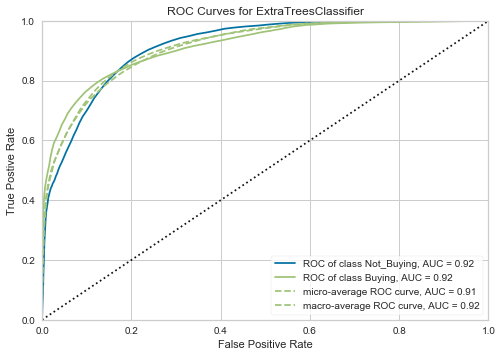

In [19]:

from yellowbrick.classifier import ROCAUC

class_weight = {0:.2 , 1: 1.3}
etc = ExtraTreesClassifier(class_weight=class_weight)
visualizer = ROCAUC(etc, classes=["Not_Buying", "Buying"])

visualizer.fit(smote_X_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(smote_X_test, smote_y_test)        # Evaluate the model on the test data
visualizer.show()    

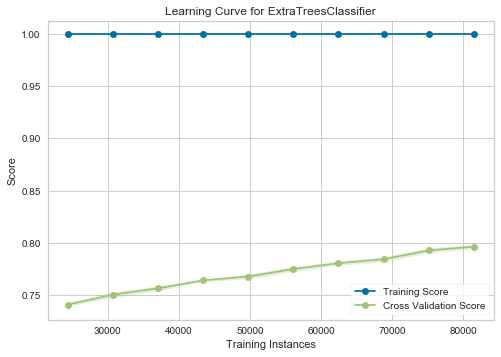

In [20]:
from yellowbrick.model_selection import LearningCurve

cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualize
class_weight = {0:.2 , 1: 1.3}
etc = ExtraTreesClassifier(class_weight=class_weight)
visualizer = LearningCurve(
   etc, cv=3, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(smote_X_train, smote_y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

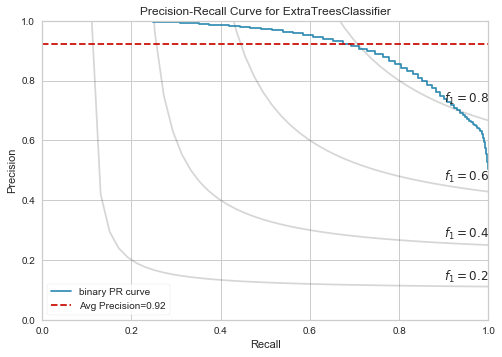

In [21]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
class_weight = {0:.2 , 1: 1.3}
etc = ExtraTreesClassifier(class_weight=class_weight)
viz = PrecisionRecallCurve(
    etc, per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False,classes=["Not_Buying", "Buying"]
)
viz.fit(smote_X_train, smote_y_train)
viz.score(smote_X_test, smote_y_test)
viz.show()

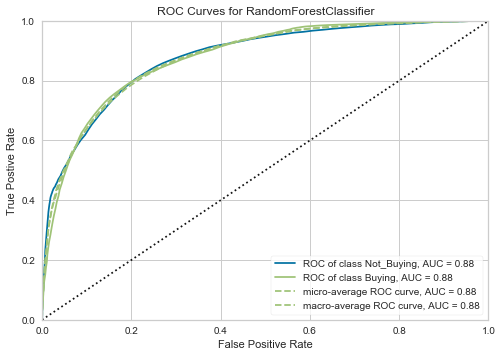

In [22]:
class_weight = {0:.7 , 1: 1}
rf = RandomForestClassifier(class_weight=class_weight)
visualizer = ROCAUC(rf, classes=["Not_Buying", "Buying"])

visualizer.fit(smote_X_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(smote_X_test, smote_y_test)        # Evaluate the model on the test data
visualizer.show()

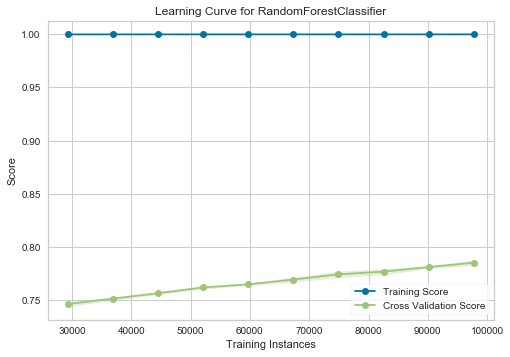

In [23]:
from yellowbrick.model_selection import LearningCurve

cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualize
class_weight = {0:.7 , 1: 1}
rf = RandomForestClassifier(class_weight=class_weight)
visualizer = LearningCurve(
   rf, cv=5, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(smote_X_train, smote_y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

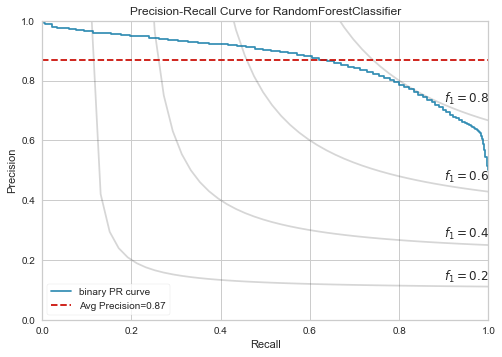

In [24]:
# Create the visualizer, fit, score, and show it
class_weight = {0:.7 , 1: 1}
rf = RandomForestClassifier(class_weight=class_weight)
viz = PrecisionRecallCurve(
    rf, per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False, classes=["Not_Buying", "Buying"]
)
viz.fit(smote_X_train, smote_y_train)
viz.score(smote_X_test, smote_y_test)
viz.show()

## Cat_BOOst && LGB
### It was  found that cat boost is giving a good result compare to LGB_classifier!!!!!!!!

# CatBoost Hyperparameter 
        ## It has selected using Grid_searchCV for about 3 hours and the parameter is selected
        ## It is found that After 15000 iteration Overfitting is observed fora patience of 4 


In [29]:

cat = CatBoostClassifier(learning_rate=0.02, l2_leaf_reg=1, iterations= 15000, depth= 9, border_count= 20,eval_metric = 'AUC')

cat= cat.fit(smote_X_train,smote_y_train,eval_set=(smote_X_test, smote_y_test),early_stopping_rounds=70,verbose=50)

pred_proba = cat.predict_proba(smote_X_test)[:, 1]
print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(smote_y_test,pred_proba)))
cat_pred = cat.predict(smote_X_test)

0:	test: 0.7420659	best: 0.7420659 (0)	total: 440ms	remaining: 1h 50m 1s
50:	test: 0.7886093	best: 0.7887517 (49)	total: 8.63s	remaining: 42m 10s
100:	test: 0.7956325	best: 0.7956325 (100)	total: 16.4s	remaining: 40m 12s
150:	test: 0.8002423	best: 0.8002423 (150)	total: 24.3s	remaining: 39m 45s
200:	test: 0.8037136	best: 0.8037136 (200)	total: 32.2s	remaining: 39m 29s
250:	test: 0.8069577	best: 0.8069577 (250)	total: 40.3s	remaining: 39m 28s
300:	test: 0.8087342	best: 0.8087342 (300)	total: 49.8s	remaining: 40m 30s
350:	test: 0.8107536	best: 0.8107536 (350)	total: 57.8s	remaining: 40m 13s
400:	test: 0.8124817	best: 0.8124817 (400)	total: 1m 7s	remaining: 40m 53s
450:	test: 0.8142427	best: 0.8142427 (450)	total: 1m 15s	remaining: 40m 49s
500:	test: 0.8159313	best: 0.8159313 (500)	total: 1m 25s	remaining: 41m 12s
550:	test: 0.8173241	best: 0.8173241 (550)	total: 1m 35s	remaining: 41m 41s
600:	test: 0.8186567	best: 0.8186567 (600)	total: 1m 44s	remaining: 41m 38s
650:	test: 0.8202433	best

5300:	test: 0.8885863	best: 0.8885863 (5300)	total: 16m 39s	remaining: 30m 29s
5350:	test: 0.8889544	best: 0.8889544 (5350)	total: 16m 49s	remaining: 30m 19s
5400:	test: 0.8892601	best: 0.8892601 (5400)	total: 16m 58s	remaining: 30m 9s
5450:	test: 0.8895914	best: 0.8895914 (5450)	total: 17m 7s	remaining: 29m 59s
5500:	test: 0.8898957	best: 0.8898959 (5497)	total: 17m 16s	remaining: 29m 50s
5550:	test: 0.8901515	best: 0.8901515 (5550)	total: 17m 25s	remaining: 29m 39s
5600:	test: 0.8904324	best: 0.8904324 (5600)	total: 17m 34s	remaining: 29m 30s
5650:	test: 0.8906815	best: 0.8906815 (5650)	total: 17m 43s	remaining: 29m 19s
5700:	test: 0.8909649	best: 0.8909680 (5699)	total: 17m 53s	remaining: 29m 10s
5750:	test: 0.8912429	best: 0.8912429 (5750)	total: 18m 2s	remaining: 29m
5800:	test: 0.8915005	best: 0.8915005 (5800)	total: 18m 11s	remaining: 28m 50s
5850:	test: 0.8917414	best: 0.8917414 (5850)	total: 18m 20s	remaining: 28m 41s
5900:	test: 0.8920059	best: 0.8920059 (5900)	total: 18m 29s

10500:	test: 0.9066718	best: 0.9066722 (10499)	total: 33m 4s	remaining: 14m 10s
10550:	test: 0.9067541	best: 0.9067598 (10546)	total: 33m 14s	remaining: 14m
10600:	test: 0.9068333	best: 0.9068357 (10598)	total: 33m 24s	remaining: 13m 51s
10650:	test: 0.9069133	best: 0.9069133 (10650)	total: 33m 34s	remaining: 13m 42s
10700:	test: 0.9070020	best: 0.9070020 (10700)	total: 33m 43s	remaining: 13m 32s
10750:	test: 0.9070809	best: 0.9070849 (10748)	total: 33m 53s	remaining: 13m 23s
10800:	test: 0.9071694	best: 0.9071715 (10798)	total: 34m 4s	remaining: 13m 14s
10850:	test: 0.9072698	best: 0.9072730 (10849)	total: 34m 14s	remaining: 13m 5s
10900:	test: 0.9073604	best: 0.9073694 (10897)	total: 34m 24s	remaining: 12m 56s
10950:	test: 0.9074602	best: 0.9074605 (10946)	total: 34m 33s	remaining: 12m 46s
11000:	test: 0.9075262	best: 0.9075262 (11000)	total: 34m 42s	remaining: 12m 37s
11050:	test: 0.9076307	best: 0.9076332 (11048)	total: 34m 52s	remaining: 12m 27s
11100:	test: 0.9077341	best: 0.9077

# ROC_Auc Curve for Cat BOOst Classifier

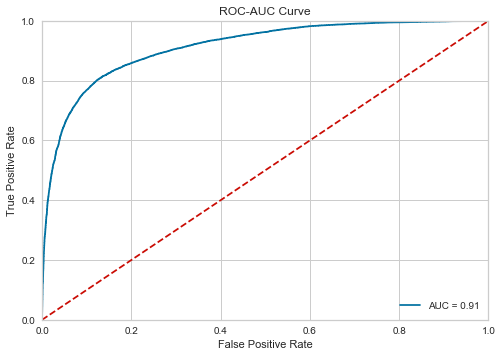

In [59]:
pred_proba = cat.predict_proba(smote_X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(smote_y_test,pred_proba)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()

## precision Recall curve for Catboost Classifier

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.92')

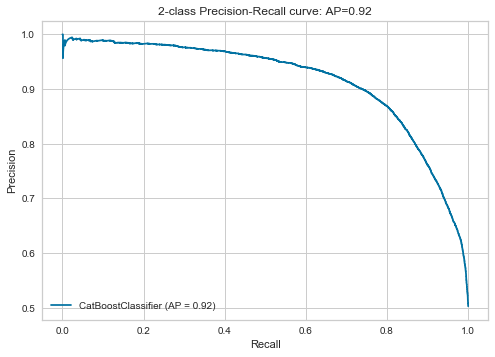

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
average_precision= 0.92
disp = plot_precision_recall_curve(cat, smote_X_test, smote_y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [42]:
from sklearn.model_selection import StratifiedKFold
lgb = LGBMClassifier(n_estimators=1000,depth=5,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)              # The parameter here are selected by manual tuning 


fold = StratifiedKFold(n_splits = 5, shuffle =True)
pred = []
score =[]
for train_index , test_index in fold.split(smote_X_train,smote_y_train):
    X_train,X_test = smote_X_train.iloc[train_index], smote_X_train.iloc[test_index]
    y_train,y_test = smote_y_train.iloc[train_index], smote_y_train.iloc[test_index]
   
    lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=100,early_stopping_rounds= 50)#,categorical_feature=cat_col
    pred_proba = lgb.predict_proba(X_test)[:, 1]
    score.append(roc_auc_score(y_test, pred_proba))

[LightGBM] [Warning] Unknown parameter: depth
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.818983
[200]	valid_0's auc: 0.826774
[300]	valid_0's auc: 0.829943
[400]	valid_0's auc: 0.831898
[500]	valid_0's auc: 0.833423
[600]	valid_0's auc: 0.835032
[700]	valid_0's auc: 0.836486
[800]	valid_0's auc: 0.837536
[900]	valid_0's auc: 0.838761
[1000]	valid_0's auc: 0.839719
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.839719
[LightGBM] [Warning] Unknown parameter: depth
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.819921
[200]	valid_0's auc: 0.827714
[300]	valid_0's auc: 0.831368
[400]	valid_0's auc: 0.833476
[500]	valid_0's auc: 0.834907
[600]	valid_0's auc: 0.83634
[700]	valid_0's auc: 0.837634
[800]	valid_0's auc: 0.838858
[900]	valid_0's auc: 0.839942
[1000]	valid_0's auc: 0.840978
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.840978
[LightGBM] [Warning] Unknow

## Auc_roc curve for lightgbm Classifier 

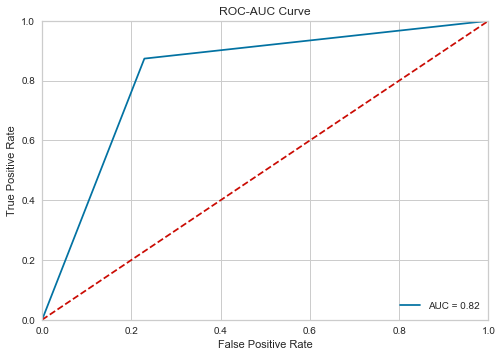

In [45]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(smote_y_test,cat_pred)#cat_pred
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()


## precision Recall curve along with F1_Score for Lgb classifier

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

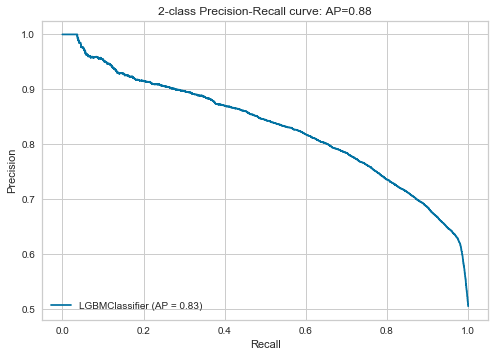

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
average_precision= 0.88
disp = plot_precision_recall_curve(lgb, smote_X_test, smote_y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

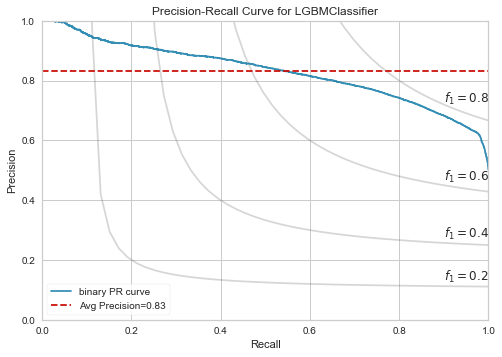

In [47]:
from yellowbrick.classifier import PrecisionRecallCurve


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    lgb, per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

### learning curve for Lgb classifier

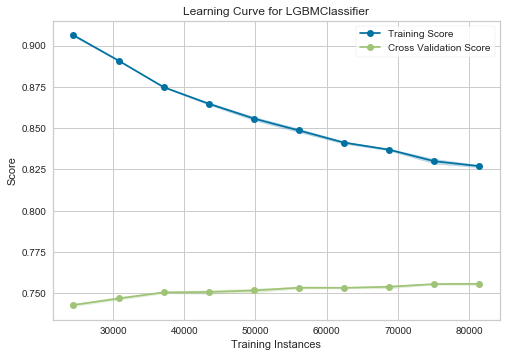

In [49]:
from yellowbrick.model_selection import LearningCurve

cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualize

visualizer = LearningCurve(
   lgb, cv=3, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(smote_X_train, smote_y_train)        # Fit the data to the visualizer
visualizer.show() 

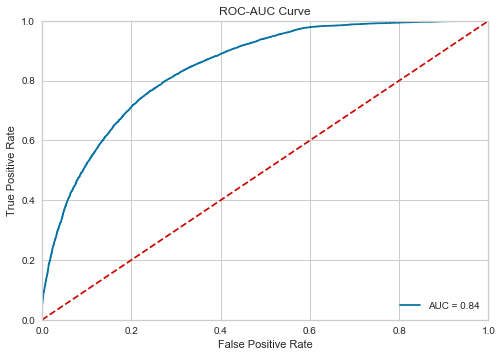

In [50]:
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_proba)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()

### Feature importance

## Cat BOost based Feature Importance

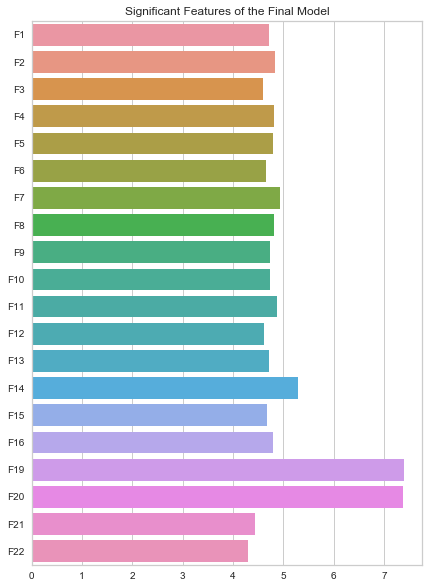

In [51]:
plt.figure(figsize=(7,10))
sns.barplot(x=cat.feature_importances_,y=X.columns)
plt.title('Significant Features of the Final Model')
plt.show()

## Lgb Bsaed feature importance

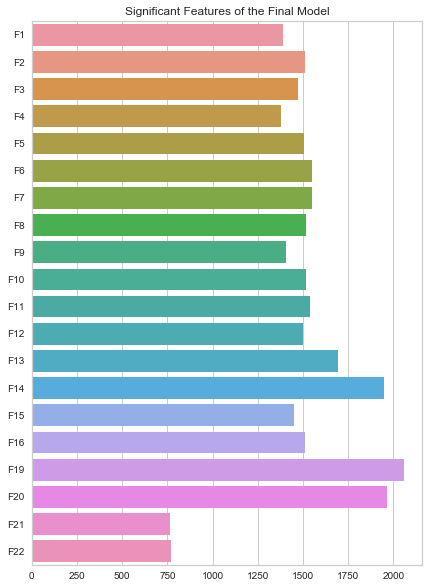

In [52]:
plt.figure(figsize=(7,10))
sns.barplot(x=lgb.feature_importances_,y=X.columns)
plt.title('Significant Features of the Final Model')
plt.show()

## LihtGBM with Eli5 package based Feature importance

In [53]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgb, random_state=1).fit(smote_X_train,smote_y_train)
eli5.show_weights(perm, feature_names = smote_X_train.columns.tolist())

Weight,Feature
0.0986 ± 0.0016,F19
0.0986 ± 0.0012,F20
0.0195 ± 0.0008,F14
0.0178 ± 0.0009,F4
0.0177 ± 0.0009,F13
0.0168 ± 0.0003,F2
0.0151 ± 0.0007,F3
0.0138 ± 0.0013,F1
0.0136 ± 0.0007,F11
0.0133 ± 0.0009,F5


## CatBoost with Eli5 package based Feature importance!!!!
####     It shows F19,F20 Effecting more along with weights is displayed below

In [54]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(cat, random_state=1).fit(smote_X_train,smote_y_train)
eli5.show_weights(perm, feature_names = smote_X_train.columns.tolist())

Weight,Feature
0.1058 ± 0.0009,F20
0.1051 ± 0.0010,F19
0.0218 ± 0.0006,F4
0.0208 ± 0.0002,F14
0.0192 ± 0.0008,F2
0.0182 ± 0.0003,F13
0.0177 ± 0.0004,F1
0.0172 ± 0.0002,F7
0.0168 ± 0.0005,F11
0.0168 ± 0.0005,F8


In [60]:
confusion_matrix(smote_y_test,cat_pred)

array([[11715,  3483],
       [ 1939, 13405]], dtype=int64)

# Plotting confusion matrix of Cat Boost classifier

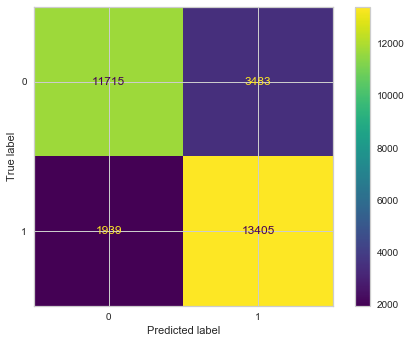

In [65]:
plot_confusion_matrix(cat, smote_X_test, smote_y_test)

# Test set predictions

In [ ]:
cat_pred = cat.predict(smote_X_test)
cat_pred

In [ ]:
plot_confusion_matrix(confusion_matrix(smote_y_test,cat_pred))

In [ ]:
#Make predictions using the features from the test data set
predictions = cat.predict(test)

#Display our predictions - they are either 0 or 1 for each training instance 
#depending on whether our algorithm believes the person survived or not.
predictions

In [ ]:
### Fianl Prediction

In [ ]:
cat_pred=cat.predict(smote_X_test)#,prediction_type='RawFormulaVal'

In [30]:
test.index

Index(['T30234341', 'T30234342', 'T30234343', 'T30234344', 'T30234345',
       'T30234346', 'T30234347', 'T30234348', 'T30234349', 'T30234350',
       ...
       'T30254244', 'T30254245', 'T30254246', 'T30254247', 'T30254248',
       'T30254249', 'T30254250', 'T30254251', 'T30254252', 'T30254253'],
      dtype='object', name='Index', length=19913)

In [32]:
#x1 = lgb.predict(test)
x2 = cat.predict(test)

In [38]:
predictions = pd.Series(x2)

In [39]:
#Create a  DataFrame with the user ids and our prediction regarding whether they Buying or not
submission = pd.DataFrame({'UserId':test.index,'Prediction':predictions})

#Visualize the first 5 rows
submission.head()

,UserId,Prediction
0,T30234341,1
1,T30234342,0
2,T30234343,0
3,T30234344,0
4,T30234345,0


In [41]:
submission.to_csv(r'C:\Users\Administrator\Desktop\dlproject\Haikujum\Haiku_Predicstion.csv',index=True)

In [35]:
pd.Series(x2).value_counts()

0    14754
1     5159
dtype: int64